In [7]:
pip install pandas numpy scikit-learn gensim matplotlib seaborn plotly

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "The cat sat on the mat with younes",
    "The dog sat on the log",
    "The cat and the dog"
]


vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(corpus)

bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("--- Bag of Words Matrix ---")
print(bow_df)

--- Bag of Words Matrix ---
   cat  dog  log  mat  sat  younes
0    1    0    0    1    1       1
1    0    1    1    0    1       0
2    1    1    0    0    0       0


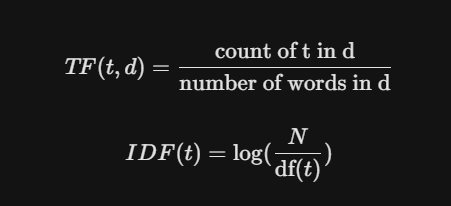

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("--- TF-IDF Matrix ---")
print(tfidf_df.round(2))

--- TF-IDF Matrix ---
    cat   dog   log   mat   sat  younes
0  0.43  0.00  0.00  0.56  0.43    0.56
1  0.00  0.52  0.68  0.00  0.52    0.00
2  0.71  0.71  0.00  0.00  0.00    0.00


In [10]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from gensim.models import Word2Vec
corpus = [
    "The cat sat on the mat",
    "The dog sat on the log",
    "The cat and the dog",
    "The cat ate the food",
    "The dog ate the food"
]
tokenized_corpus = [doc.lower().split() for doc in corpus]

# 2. Train the Model

model = Word2Vec(sentences=tokenized_corpus, vector_size=10, window=5, min_count=1, workers=4)

# 3. Access Vectors
vector = model.wv['cat']

# 4. Check Similarity
similarity = model.wv.most_similar('cat', topn=2)

print(f"Vector for 'cat' (size {len(vector)}): \n{vector}")
print(f"\nMost similar words to 'cat': {similarity}")

Vector for 'cat' (size 10): 
[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]

Most similar words to 'cat': [('and', 0.42731544375419617), ('dog', 0.32937225699424744)]


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

products = [
    "Red running shoes with soft cushioning",
    "Slim fit mens denim jeans",
    "Waterproof hiking boots for mountains",
    "Casual white sneakers for daily wear",
    "Denim jacket with vintage look"
]

def search_products(query, corpus):
    # 1. Initialize Vectorizer
    vectorizer = TfidfVectorizer(stop_words='english')

    # 2. Fit/Transform Corpus
    # We fit on the corpus to learn the vocabulary
    tfidf_corpus = vectorizer.fit_transform(corpus)

    # 3. Transform Query
    # CRITICAL: Do NOT fit on the query, only transform!
    tfidf_query = vectorizer.transform([query])

    # 4. Calculate Cosine Similarity
    # linear_kernel is equivalent to cosine_similarity for normalized vectors (TF-IDF is normalized)
    # It returns an array of shape (1, n_samples)
    cosine_sim = linear_kernel(tfidf_query, tfidf_corpus)

    # 5. Get Indices of Top Scores
    # argsort sorts in ascending order, so we take the last 2 and reverse them [::-1]
    sim_scores = cosine_sim[0]
    top_indices = sim_scores.argsort()[-2:][::-1]

    # 6. Retrieve Documents
    top_docs = [corpus[i] for i in top_indices]

    return top_docs

# Test
user_query = "denim  boots"
results = search_products(user_query, products)

print(f"Query: {user_query}")
print("Top Matches:")
for res in results:
    print(f"- {res}")

Query: denim  boots
Top Matches:
- Waterproof hiking boots for mountains
- Denim jacket with vintage look


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

products = [
    "Red running shoes with soft cushioning",
    "Slim fit mens denim jeans",
    "Waterproof hiking boots for mountains",
    "Casual white sneakers for daily wear",
    "Denim jacket with vintage look"
]

def search_bow(query, corpus):
    # 1. Initialize CountVectorizer
    # We use binary=False to count occurrences (Standard BoW)
    vectorizer = CountVectorizer(stop_words='english')

    # 2. Fit/Transform Corpus
    bow_corpus = vectorizer.fit_transform(corpus)

    # 3. Transform Query
    bow_query = vectorizer.transform([query])

    # 4. Calculate Similarity
    # We still use cosine similarity to find the closest vectors
    cosine_sim = cosine_similarity(bow_query, bow_corpus)

    # 5. Sort and Retrieve
    sim_scores = cosine_sim[0]
    top_indices = sim_scores.argsort()[-2:][::-1]

    return [corpus[i] for i in top_indices]

# Test
results = search_bow("denim sneakers", products)
print(f"--- BoW Results ---\n{results}")

--- BoW Results ---
['Denim jacket with vintage look', 'Casual white sneakers for daily wear']


In [14]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

products = [
    "Red running shoes with soft cushioning",
    "Slim fit mens denim jeans",
    "Waterproof hiking boots for mountains",
    "Casual white sneakers for daily wear",
    "Denim jacket with vintage look"
]

def preprocess(text):
    return text.lower().split()

def get_doc_vector(doc_tokens, model):
    vectors = [model.wv[word] for word in doc_tokens if word in model.wv]
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

def search_embeddings(query, corpus):
    # 1. Prepare Data
    tokenized_corpus = [preprocess(doc) for doc in corpus]

    # 2. Train Model (In real life, load a pre-trained one!)
    # vector_size=10 is small for demo; usually 100-300
    model = Word2Vec(sentences=tokenized_corpus, vector_size=100, min_count=1, window=5, seed=42)

    # 3. Vectorize Corpus
    # Convert every sentence into a single averaged vector
    corpus_vectors = np.array([get_doc_vector(doc, model) for doc in tokenized_corpus])

    # 4. Vectorize Query
    query_tokens = preprocess(query)
    query_vector = get_doc_vector(query_tokens, model).reshape(1, -1)

    # 5. Similarity
    cosine_sim = cosine_similarity(query_vector, corpus_vectors)

    # 6. Sort and Retrieve
    sim_scores = cosine_sim[0]
    top_indices = sim_scores.argsort()[-2:][::-1]

    return [corpus[i] for i in top_indices]

# Test
results = search_embeddings("weekly shoe", products)
print(f"--- Embedding Results ---\n{results}")

--- Embedding Results ---
['Denim jacket with vintage look', 'Casual white sneakers for daily wear']
